## 데이터 다운로드

In [1]:
from urllib.request import urlretrieve

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

savepath = '../datasets/winequality-white.csv'

urlretrieve(url, savepath)

('../datasets/winequality-white.csv',
 <http.client.HTTPMessage at 0x13e21790148>)

## 데이터 읽기

In [2]:
import pandas as pd

df = pd.read_csv('../datasets/winequality-white.csv', sep=';')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


## 와인 품질 판정

### 알고리즘 선정
- 랜덤 포레스트 선정 (by [치트 시트](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

y = df['quality']
x = df.drop(columns='quality')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

y_pred = rf_clf.predict(x_test)

print(classification_report(y_test, y_pred))
print('정답률 =', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.82      0.27      0.41        33
           5       0.74      0.66      0.70       308
           6       0.63      0.82      0.71       420
           7       0.79      0.60      0.68       188
           8       0.75      0.35      0.47        26
           9       0.00      0.00      0.00         2

    accuracy                           0.69       980
   macro avg       0.53      0.38      0.42       980
weighted avg       0.70      0.69      0.68       980

정답률 = 0.689795918367347


## 정답률 올리기

### label 분포
- 불균형 데이터

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


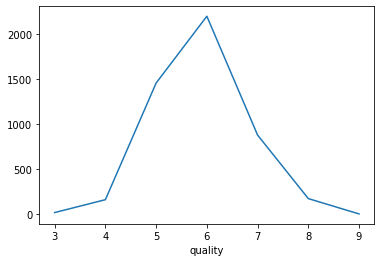

In [6]:
import matplotlib.pyplot as plt

count_data = df.groupby('quality').size()
print(count_data)

count_data.plot()
plt.show()

### label 변경
- 4 이하, 5 이상 7 이하, 8 이상으로 분류

In [7]:
new_list = []
for v in list(y):
    if v <= 4:
        new_list += [0]
    elif v <= 7:
        new_list += [1]
    else:
        new_list += [2]
y = new_list

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

y_pred = rf_clf.predict(x_test)

print(classification_report(y_test, y_pred))
print('정답률 =', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25        42
           1       0.93      0.99      0.96       894
           2       0.93      0.32      0.47        44

    accuracy                           0.93       980
   macro avg       0.79      0.49      0.56       980
weighted avg       0.91      0.93      0.91       980

정답률 = 0.9255102040816326
